<a href="https://colab.research.google.com/github/yellomello/Georgian_DCC/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT 2**  

Link to the dataset: https://github.com/yellomello/Georgian_DCC/blob/main/649.csv  
Name : Marc Hansel John Thomas  
Student_ID : 200535250  


## Imports

In [2]:
!apt-get update #update linux
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #download and install openjdk
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz #download spark binary (gunzip). -q: Turn off Wget’s output.
!tar xf spark-3.2.1-bin-hadoop2.7.tgz #extract the spark package
!pip install -q findspark #install the findspark package

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,084 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,34

In [13]:
#set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [14]:
# From Spark 2.0, SparkSession provides a common entry point for a Spark application
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark.conf.set('spark.sql.shuffle.partitions', 6)
# spark.conf.set('spark.executor.memory', '2g')
spark

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

import time
from pyspark.sql.types import *

#filepath
file_location = "/content/drive/MyDrive/Datasets/649.csv"


## Question 1. Import the data using inferred schema. Log the time taken to import.

In [18]:
#Question 1:

#reading the start time
start_time = time.time()

# create DataFrame
data = (
  spark
    .read
    .csv(file_location, header=True, inferSchema = True)
)

read_time = time.time() - start_time

print("Time taken to import the CSV file: {:.2f} seconds".format(read_time))
# create table for SQL analytics
data.createOrReplaceTempView("data_649")

data.show()

Time taken to import the CSV file: 0.64 seconds
+-------+-----------+---------------+----------+--------------+--------------+--------------+--------------+--------------+--------------+------------+
|PRODUCT|DRAW NUMBER|SEQUENCE NUMBER| DRAW DATE|NUMBER DRAWN 1|NUMBER DRAWN 2|NUMBER DRAWN 3|NUMBER DRAWN 4|NUMBER DRAWN 5|NUMBER DRAWN 6|BONUS NUMBER|
+-------+-----------+---------------+----------+--------------+--------------+--------------+--------------+--------------+--------------+------------+
|    649|          1|              0| 6/12/1982|             3|            11|            12|            14|            41|            43|          13|
|    649|          2|              0| 6/19/1982|             8|            33|            36|            37|            39|            41|           9|
|    649|          3|              0| 6/26/1982|             1|             6|            23|            24|            27|            39|          34|
|    649|          4|              0|  7

## Question 2.	Define the schema and then import the data using your defined schema. Log the time taken to import.

In [19]:
# create schema
data_Schema = StructType([
  StructField("PRODUCT", IntegerType(), True),
  StructField("DRAW NUMBER", IntegerType(), True),
  StructField("SEQUENCE NUMBER", IntegerType(), True),
  StructField("DRAW DATE", DateType(), True),
  StructField("NUMBER DRAWN 1", IntegerType(), True),
  StructField("NUMBER DRAWN 2", IntegerType(), True),
  StructField("NUMBER DRAWN 3", IntegerType(), True),
  StructField("NUMBER DRAWN 4", IntegerType(), True),
  StructField("NUMBER DRAWN 5", IntegerType(), True),
  StructField("NUMBER DRAWN 6", IntegerType(), True),
  StructField("BONUS NUMBER", IntegerType(), True)])


#reading the start time
start_time = time.time()

# create DataFrame
data = (
  spark
    .read
    .option("header", True)
    .option("dateFormat", "M/d/yyyy")
    .schema(data_Schema)
    .csv(file_location)
)

read_time = time.time()- start_time

print("Time taken to import the CSV file: {:.2f} seconds".format(read_time))
# create table for SQL analytics
data.createOrReplaceTempView("data_649")

data.show()

Time taken to import the CSV file: 0.06 seconds
+-------+-----------+---------------+----------+--------------+--------------+--------------+--------------+--------------+--------------+------------+
|PRODUCT|DRAW NUMBER|SEQUENCE NUMBER| DRAW DATE|NUMBER DRAWN 1|NUMBER DRAWN 2|NUMBER DRAWN 3|NUMBER DRAWN 4|NUMBER DRAWN 5|NUMBER DRAWN 6|BONUS NUMBER|
+-------+-----------+---------------+----------+--------------+--------------+--------------+--------------+--------------+--------------+------------+
|    649|          1|              0|1982-06-12|             3|            11|            12|            14|            41|            43|          13|
|    649|          2|              0|1982-06-19|             8|            33|            36|            37|            39|            41|           9|
|    649|          3|              0|1982-06-26|             1|             6|            23|            24|            27|            39|          34|
|    649|          4|              0|198

## Question 3.	Would you recommend creating a schema first before importing the data? Why?

Yes, I would definitely recommend creating a schema before importing the data as it sets the rules and the structure for the data to be imported. With the help of a schema, we can validate the data for unknown datatypes and other inconsistencies.

Defining a schema not only imporves the import time but also prevents unexpected type conversions. The Spark Engine works better when the schema is defined as it lays out a Query Execution Plan in advance thus resulting in faster and better utilization of the resources.

Overall, the data consistency is maintained and the same time, we have a faster import time when we define a schema before importing the data.



## Question 4.	Provide summary statistics on the dataset.

In [20]:
data.describe().show()

+-------+-------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+
|summary|PRODUCT|       DRAW NUMBER|     SEQUENCE NUMBER|    NUMBER DRAWN 1|    NUMBER DRAWN 2|    NUMBER DRAWN 3|    NUMBER DRAWN 4|    NUMBER DRAWN 5|   NUMBER DRAWN 6|      BONUS NUMBER|
+-------+-------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+
|  count|   3665|              3665|                3665|              3665|              3665|              3665|              3665|              3665|             3665|              3665|
|   mean|  649.0|1819.4949522510233|0.030832196452933152|7.3276944065484315|14.568076398362892|21.890859481582538|28.978444747612553|36.162619372442016|43.09904502046385|24.599454297407913|
| stddev|    0.0|1039.2395439633099| 0.23798414328

## Question 5.	Identify the top 5 winning numbers.

In [21]:
df_sql = spark.sql('''
SELECT number, COUNT(*) AS occurrence
FROM (
  SELECT `NUMBER DRAWN 1` AS number FROM data_649
  UNION ALL
  SELECT `NUMBER DRAWN 2` AS number FROM data_649
  UNION ALL
  SELECT `NUMBER DRAWN 3` AS number FROM data_649
  UNION ALL
  SELECT `NUMBER DRAWN 4` AS number FROM data_649
  UNION ALL
  SELECT `NUMBER DRAWN 5` AS number FROM data_649
  UNION ALL
  SELECT `NUMBER DRAWN 6` AS number FROM data_649
  UNION ALL
  SELECT `BONUS NUMBER` AS number FROM data_649
  ) AS subquery
GROUP BY number
ORDER BY occurrence DESC
LIMIT 5;

''')
df_sql.show()

+------+----------+
|number|occurrence|
+------+----------+
|    31|       568|
|    34|       559|
|    45|       559|
|    47|       559|
|    40|       557|
+------+----------+



## Question 6.	For the top 5 numbers identified in \#5, plot the line charts to show the cumulative winning occurrence from 1982 to 2018.

### Part 1: For all numbers (31,34,45,47,40) occurences

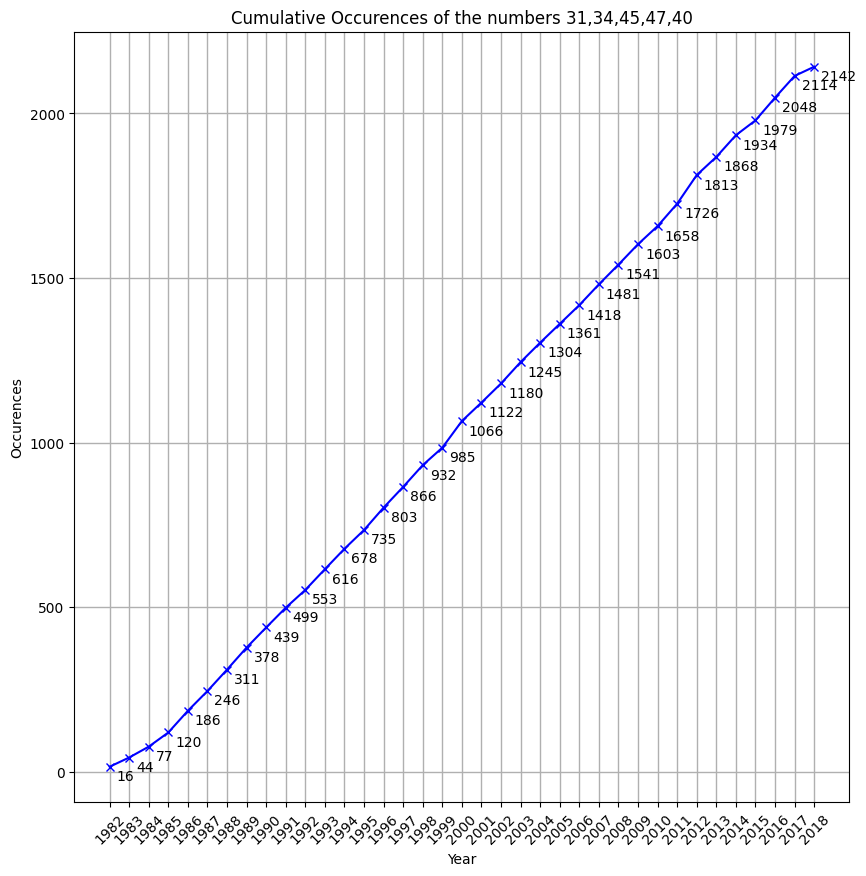

In [111]:
all_numbers=spark.sql(
'''
SELECT
  EXTRACT(YEAR FROM `DRAW DATE`) AS year,
  COUNT(*) AS occurences

/*
  `DRAW DATE`,
  `NUMBER DRAWN 1`,
  `NUMBER DRAWN 2`,
  `NUMBER DRAWN 3`,
  `NUMBER DRAWN 4`,
  `NUMBER DRAWN 5`,
  `NUMBER DRAWN 6`,
  `BONUS NUMBER`
*/

FROM data_649
WHERE `NUMBER DRAWN 1` IN (31,34,45,47,40)
   OR `NUMBER DRAWN 2` IN (31,34,45,47,40)
   OR `NUMBER DRAWN 3` IN (31,34,45,47,40)
   OR `NUMBER DRAWN 4` IN (31,34,45,47,40)
   OR `NUMBER DRAWN 5` IN (31,34,45,47,40)
   OR `NUMBER DRAWN 6` IN (31,34,45,47,40)
   OR `BONUS NUMBER`   IN (31,34,45,47,40)
   AND EXTRACT(YEAR FROM `DRAW DATE`) BETWEEN 1982 AND 2018
GROUP BY EXTRACT(YEAR FROM `DRAW DATE`)
ORDER BY YEAR

'''
)
# all_numbers.show()
pd_all_numbers = all_numbers.toPandas()
cumulative_occ = np.cumsum(pd_all_numbers['occurences'])
fig=plt.figure(figsize =(10,10))
plt.plot(pd_all_numbers['year'], cumulative_occ,marker='x', linestyle='-', color='b')
plt.xticks(pd_all_numbers['year'], rotation=45)
for i, j in zip(pd_all_numbers['year'], cumulative_occ):
    plt.annotate(str(j), xy=(i, j), xytext=(5,-10), textcoords='offset points')
# plt.plot(x, cumulative_y, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Occurences')
plt.title('Cumulative Occurences of the numbers 31,34,45,47,40')
plt.grid(True, linewidth= 1)

### Part 2: Individual Number Occurences

In [100]:
list_of_top_5_numbers= [31,34,45,47,40]

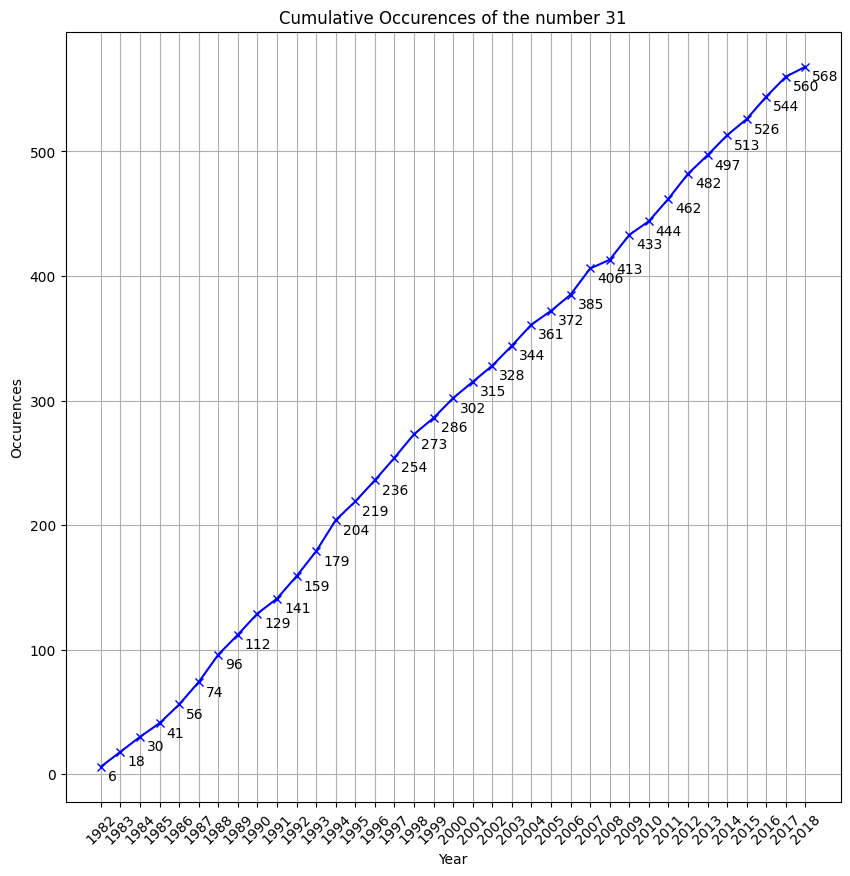

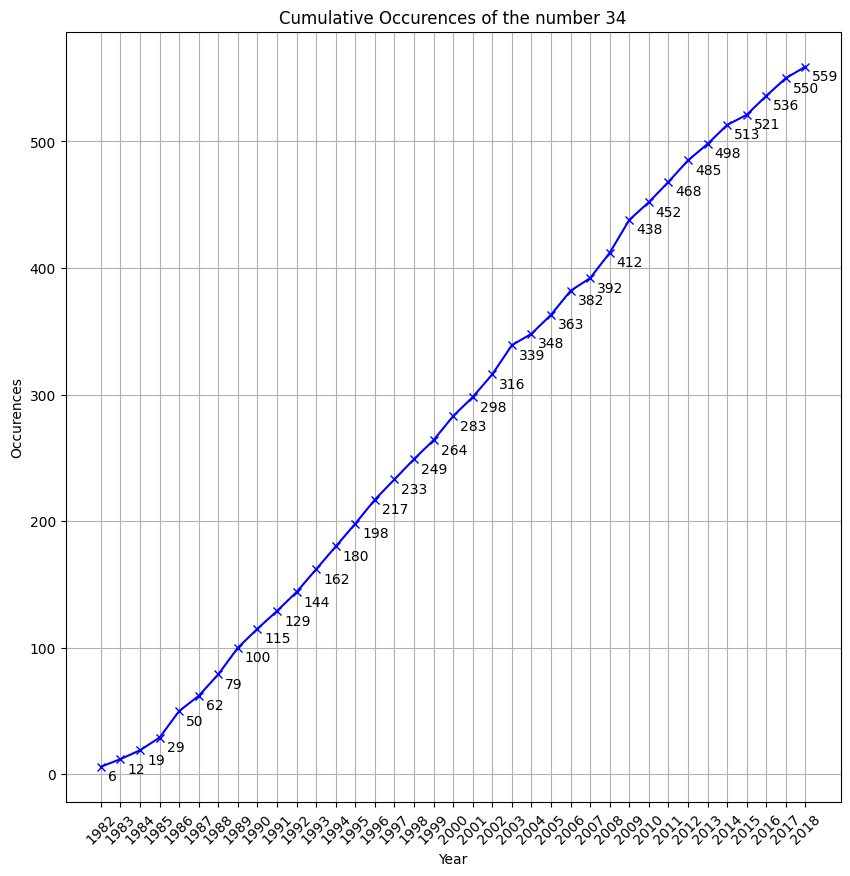

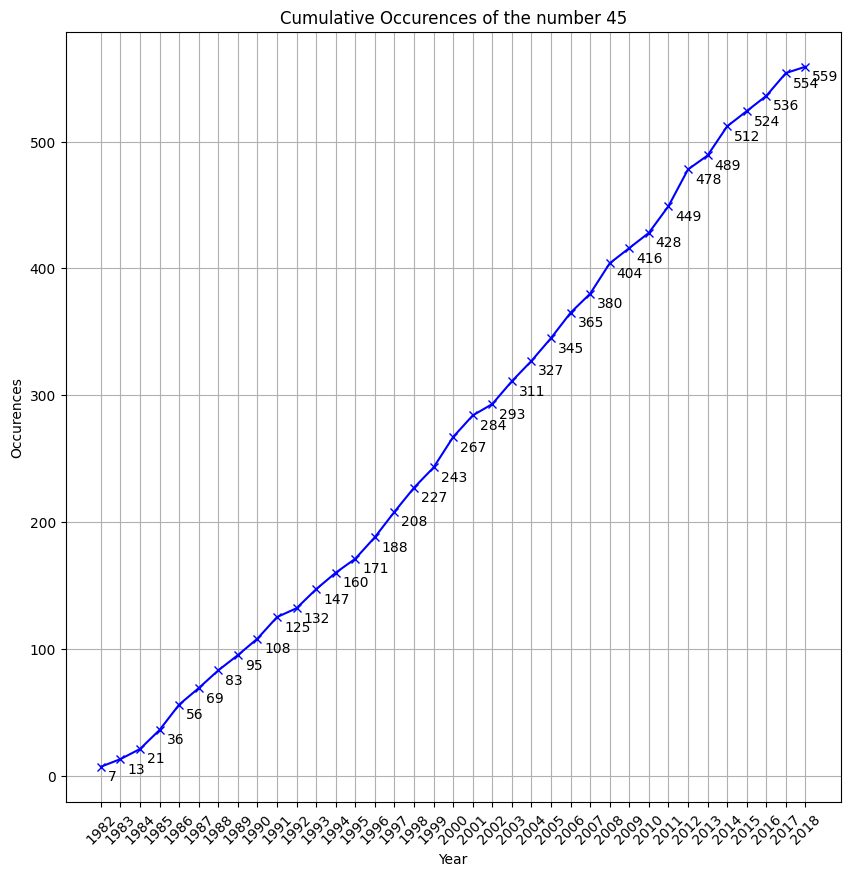

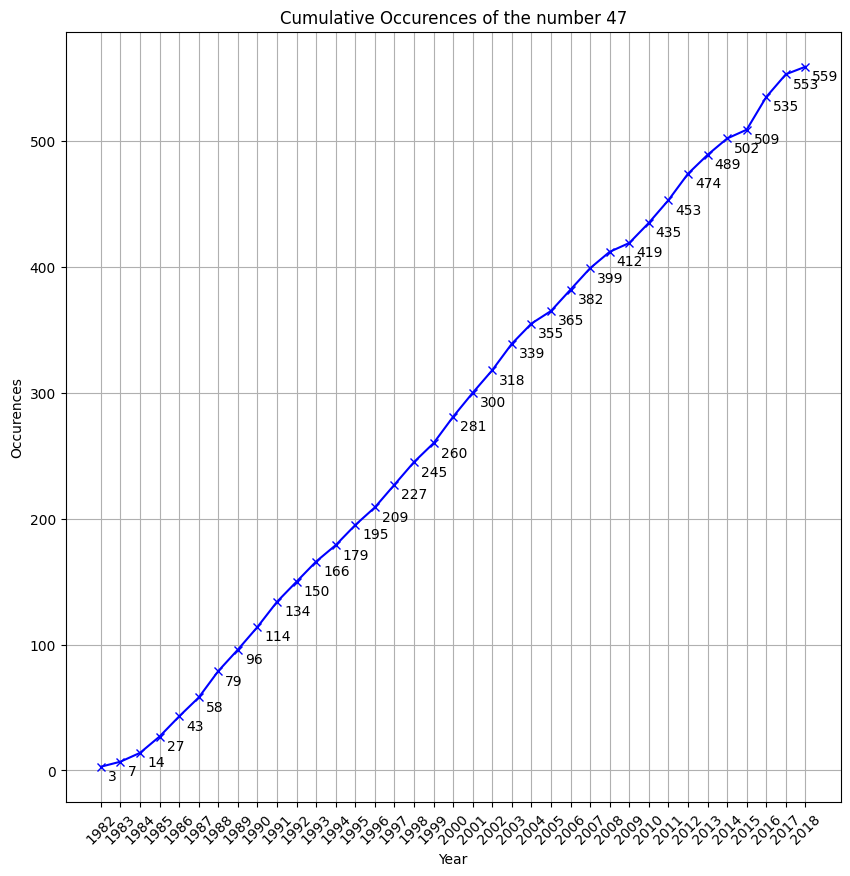

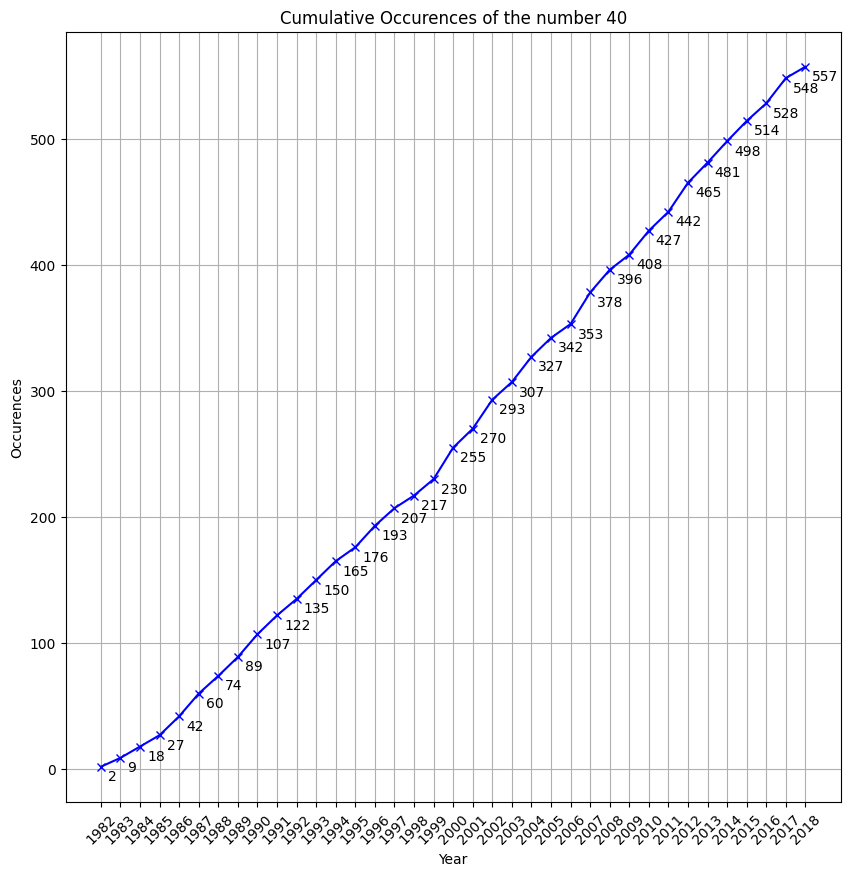

In [112]:
for i in list_of_top_5_numbers:
  all_numbers=spark.sql(
    '''
  SELECT
    EXTRACT(YEAR FROM `DRAW DATE`) AS year,
    COUNT(*) AS occurences


  FROM data_649
  WHERE `NUMBER DRAWN 1` IN ({})
    OR `NUMBER DRAWN 2` IN ({})
    OR `NUMBER DRAWN 3` IN ({})
    OR `NUMBER DRAWN 4` IN ({})
    OR `NUMBER DRAWN 5` IN ({})
    OR `NUMBER DRAWN 6` IN ({})
    OR `BONUS NUMBER`   IN ({})
    AND EXTRACT(YEAR FROM `DRAW DATE`) BETWEEN 1982 AND 2018
  GROUP BY EXTRACT(YEAR FROM `DRAW DATE`)
  ORDER BY YEAR

  '''.format(i,i,i,i,i,i,i)
  )
  # all_numbers.show()
  pd_all_numbers = all_numbers.toPandas()
  cumulative_occ = np.cumsum(pd_all_numbers['occurences'])
  fig=plt.figure(figsize =(10,10))
  plt.plot(pd_all_numbers['year'], cumulative_occ,marker='x', linestyle='-', color='b')
  plt.xticks(pd_all_numbers['year'], rotation=45)

  for u,v  in zip(pd_all_numbers['year'], cumulative_occ):
    plt.annotate(str(v), xy=(u, v), xytext=(5,-10), textcoords='offset points')
  # plt.plot(x, cumulative_y, marker='o', linestyle='-', color='b')
  plt.xlabel('Year')
  plt.ylabel('Occurences')
  plt.title('Cumulative Occurences of the number {}'.format(i))
  plt.grid(True)
  plt.show()

## Question 7.	As of June 20, 2018, show the cumulative total winning occurrences group by each number.

In [133]:

df_sql = spark.sql('''
SELECT number, occurrence, SUM(occurrence) OVER (ORDER BY number) AS cumulative_sum
FROM
  (SELECT number, COUNT(*) AS occurrence
  FROM (
    SELECT `NUMBER DRAWN 1` AS number FROM data_649
    WHERE `DRAW DATE` < '6/20/2018'

    UNION ALL
    SELECT `NUMBER DRAWN 2` AS number FROM data_649
    WHERE `DRAW DATE` < '6/20/2018'

    UNION ALL
    SELECT `NUMBER DRAWN 3` AS number FROM data_649
    WHERE `DRAW DATE` < '6/20/2018'

    UNION ALL
    SELECT `NUMBER DRAWN 4` AS number FROM data_649
    WHERE `DRAW DATE` < '6/20/2018'

    UNION ALL
    SELECT `NUMBER DRAWN 5` AS number FROM data_649
    WHERE `DRAW DATE` < '6/20/2018'

    UNION ALL
    SELECT `NUMBER DRAWN 6` AS number FROM data_649
    WHERE `DRAW DATE` < '6/20/2018'

    UNION ALL
    SELECT `BONUS NUMBER` AS number FROM data_649
    WHERE `DRAW DATE` < '2018-06-20'


    ) AS subquery

  GROUP BY number
  ORDER BY number) AS subquery2
''')
df_sql.show(50)

+------+----------+--------------+
|number|occurrence|cumulative_sum|
+------+----------+--------------+
|     0|        74|            74|
|     1|        69|           143|
|     2|        56|           199|
|     3|        81|           280|
|     4|        61|           341|
|     5|        94|           435|
|     6|        54|           489|
|     7|        73|           562|
|     8|        74|           636|
|     9|        86|           722|
|    10|        71|           793|
|    11|        86|           879|
|    12|        74|           953|
|    13|        79|          1032|
|    14|        69|          1101|
|    15|        53|          1154|
|    16|        76|          1230|
|    17|        68|          1298|
|    18|        80|          1378|
|    19|        63|          1441|
|    20|        65|          1506|
|    21|        87|          1593|
|    22|        76|          1669|
|    23|        77|          1746|
|    24|        71|          1817|
|    25|        86| 

## Question 8.	For step 7, export the results to a JSON file


In [ ]:
df_sql.write.json("total_winnings.json")